In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-03-25 00:10:16.780464: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 00:10:17.448929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("data/GOOGL.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the 'Close' column for training
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12  # You can adjust this parameter
X, Y = create_dataset(scaled_data, time_step)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

2024-03-25 00:10:18.226115: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 00:10:18.226597: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/hrishi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the 

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(X, Y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1257
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044     
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044     
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 
Epoch 16/100

In [8]:
future_period = int(len(df) * 0.1)  # Predict 10% of the given CSV's number of months into the future
future_predictions = []
last_window = scaled_data[-time_step:].reshape(1, time_step, 1)

for i in range(future_period):
    prediction = model.predict(last_window)[0][0]
    future_predictions.append(prediction)
    last_window = np.append(last_window[:, :, :], [[[prediction]]], axis=1)

# Inverse transform the predictions to get actual values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [9]:
last_date = df['Date'].iloc[-1]
date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': date_range, 'Close': future_predictions})
future_df.set_index('Date', inplace=True)

# Concatenate historical and future predictions data
combined_df = pd.concat([df, future_df])

/tmp/ipykernel_18882/3786167462.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]


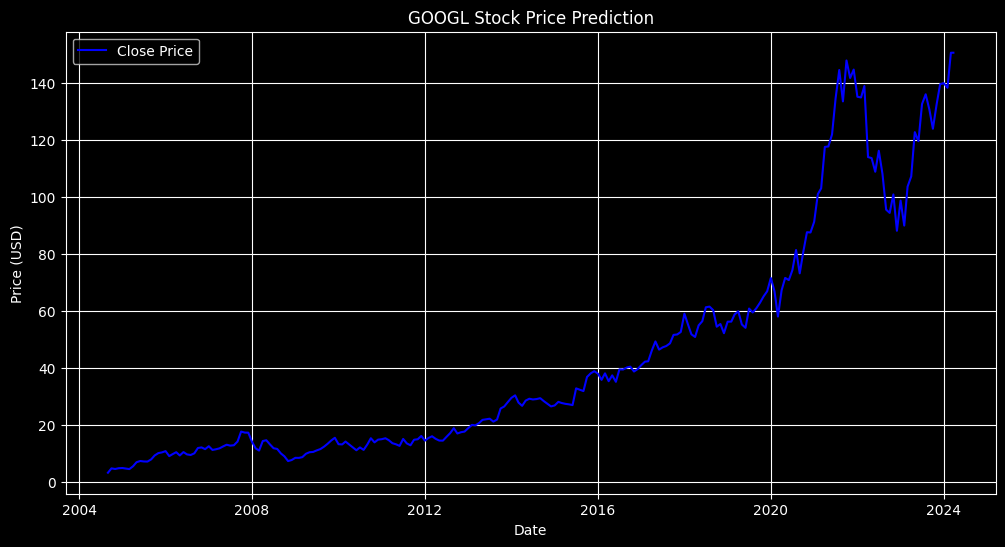

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], color='blue', label='Close Price')
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

/tmp/ipykernel_18882/850064312.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]


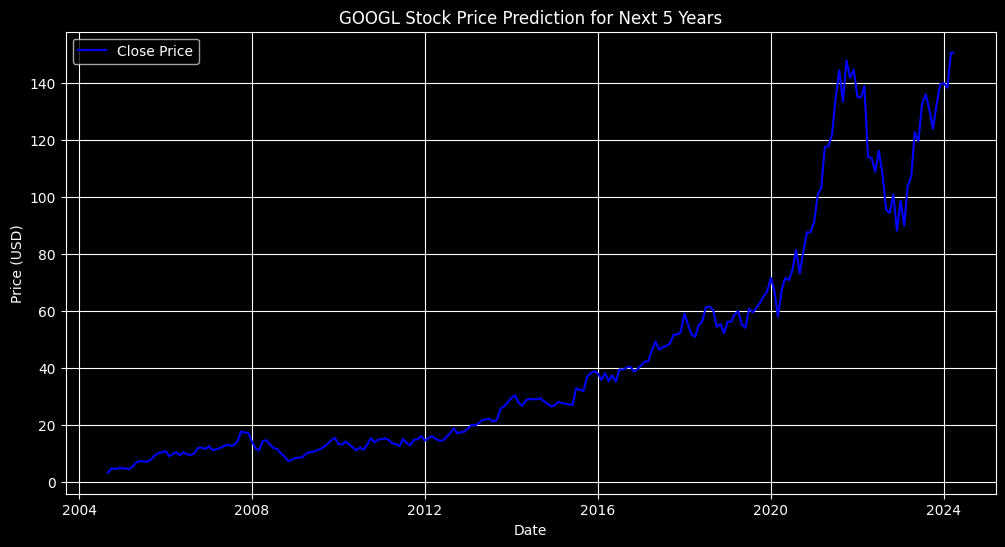

In [11]:
# Predict future values for 5 more years (60 months)
future_period = 60

# Initialize an empty array to store future predictions
future_predictions = []

# Initialize the last window with the last known data
last_window = scaled_data[-time_step:].reshape(1, time_step, 1)

# Iterate to predict each month
for i in range(future_period):
    # Predict the next value
    prediction = model.predict(last_window)[0][0]
    
    # Append the prediction to the list of future predictions
    future_predictions.append(prediction)
    
    # Append the prediction to the last window for the next iteration
    last_window = np.append(last_window[:, :, :], [[[prediction]]], axis=1)

# Inverse transform the predictions to get actual values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Extend the date index for future predictions
last_date = df['Date'].iloc[-1]
date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': date_range, 'Close': future_predictions})
future_df.set_index('Date', inplace=True)

# Concatenate historical and future predictions data
combined_df = pd.concat([df, future_df])

# Plot the combined data
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], color='blue', label='Close Price')
plt.title('GOOGL Stock Price Prediction for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_18882/1333027438.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date_range = pd.date_range(
/tmp/ipykernel_18882/1333027438.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extended_date_range = pd.date_range(


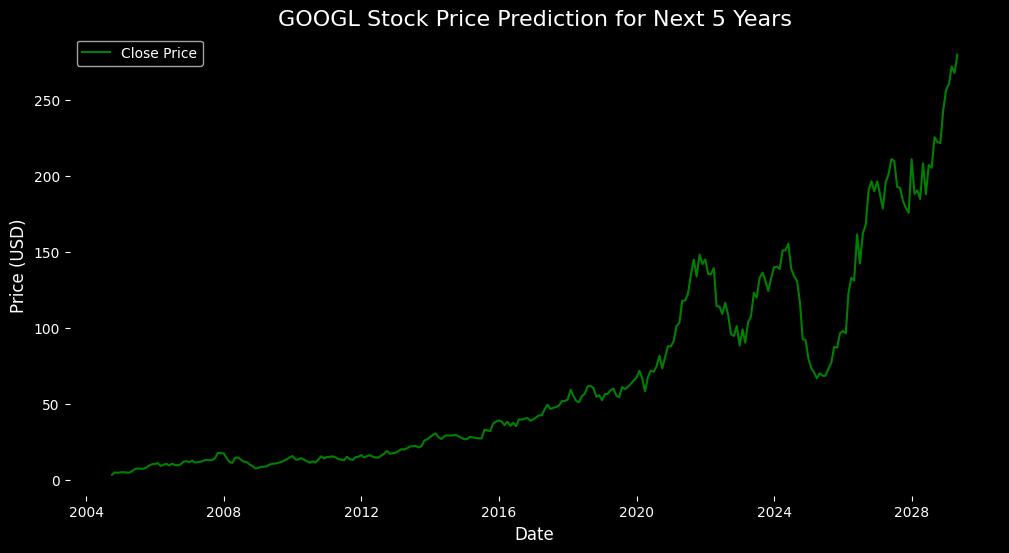

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


growth_rate = 0.02
future_predictions_growth = future_predictions * \
    (1 + growth_rate) ** np.arange(1, future_period + 1)


np.random.seed(0)
noise_scale = 0.05
rd_ns = np.random.normal(
    scale=noise_scale, size=len(future_predictions_growth))
future_predictions_trend = future_predictions_growth * (1 + rd_ns)


last_date = df['Date'].iloc[-1]
future_date_range = pd.date_range(
    start=last_date, periods=future_period + 1, freq='M')


future_df = pd.DataFrame(
    {'Date': future_date_range[1:], 'Close': future_predictions_trend})
future_df.set_index('Date', inplace=True)


combined_df = pd.concat([df, future_df])


extended_date_range = pd.date_range(
    start=df['Date'].iloc[0], periods=len(combined_df), freq='M')


plt.figure(figsize=(12, 6))
plt.plot(extended_date_range, combined_df['Close'], color='green', label='Close Price')
plt.title('GOOGL Stock Price Prediction for Next 5 Years', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)
plt.box(False)
plt.legend(['Close Price'], loc='upper left', fontsize=10)
plt.show()

In [13]:
plt.savefig('graphs/GOOGL.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>